数据链接：
https://tianchi.aliyun.com/dataset/649

或者与我联系，获取数据集 ``tianchi_mobile_recommend_train_user.csv`` .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='darkgrid', font_scale=1.5)
plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] =False


# 数据查看

In [2]:
import os

In [3]:
data_user = pd.read_csv('tianchi_mobile_recommend_train_user.csv',dtype = str)

In [4]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   user_geohash   object
 4   item_category  object
 5   time           object
dtypes: object(6)
memory usage: 561.1+ MB


In [5]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


# 数据预处理

In [6]:
# 缺失值分析，apply 默认对列进行操作
data_user.apply(lambda x: sum(x.isnull())/len(x))

user_id          0.00000
item_id          0.00000
behavior_type    0.00000
user_geohash     0.68001
item_category    0.00000
time             0.00000
dtype: float64

In [7]:
data_user.apply (lambda x: sum(x.isnull()))

user_id                0
item_id                0
behavior_type          0
user_geohash     8334824
item_category          0
time                   0
dtype: int64

In [8]:
data_user.shape

(12256906, 6)

In [9]:
data_user['date'] = data_user['time'].str[0:10]
data_user['hour'] = data_user['time'].str[11:]  #如果发生溢出就分开执行

In [10]:
data_user.dtypes

user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
date             object
hour             object
dtype: object

In [11]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [12]:
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['time']= pd.to_datetime(data_user['time'])
data_user['hour'] = data_user['hour'].astype(int)

In [13]:
data_user.dtypes

user_id                  object
item_id                  object
behavior_type            object
user_geohash             object
item_category            object
time             datetime64[ns]
date             datetime64[ns]
hour                      int64
dtype: object

In [14]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02:00:00,2014-12-06,2
1,97726136,383583590,1,NaN,5894,2014-12-09 20:00:00,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11:00:00,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10:00:00,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21:00:00,2014-12-16,21


In [15]:
#对数据进行一下排序
data_user.sort_values(by ='time',ascending=True,inplace = True)

In [16]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
1505077,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
8686537,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
4035788,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
10113411,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
2936757,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


In [17]:
data_user.tail()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
5241608,132653097,119946062,2,NaN,6054,2014-12-18 23:00:00,2014-12-18,23
10296029,130082553,296196819,1,NaN,11532,2014-12-18 23:00:00,2014-12-18,23
8527264,43592945,350594832,1,9rhhgph,9541,2014-12-18 23:00:00,2014-12-18,23
6263497,12833799,186993938,1,954g37v,3798,2014-12-18 23:00:00,2014-12-18,23
9200479,77522552,69292191,1,NaN,889,2014-12-18 23:00:00,2014-12-18,23


In [18]:
# 丢弃原有索引，按位置重新索引
data_user.reset_index(drop =True,inplace =True)

In [19]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,73462715,378485233,1,NaN,9130,2014-11-18,2014-11-18,0
1,36090137,236748115,1,NaN,10523,2014-11-18,2014-11-18,0
2,40459733,155218177,1,NaN,8561,2014-11-18,2014-11-18,0
3,814199,149808524,1,NaN,9053,2014-11-18,2014-11-18,0
4,113309982,5730861,1,NaN,3783,2014-11-18,2014-11-18,0


In [20]:
# top 是出现最多次数的那个 str 值，freq 是 top 内的值出现的次数
data_user.describe(include = ['object'])  # 第二行可以看出行为类型，用户位置类别，商品品类
# user_id 是字符串

,user_id,item_id,behavior_type,user_geohash,item_category
count,12256906,12256906,12256906,3922082,12256906
unique,10000,2876947,4,575458,8916
top,36233277,112921337,1,94ek6ke,1863
freq,31030,1445,11550581,1052,393247


In [21]:
data_user.describe(include = 'all')

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
count,12256906,12256906,12256906,3922082,12256906,12256906,12256906,1.225691e+07
unique,10000,2876947,4,575458,8916,NaN,NaN,NaN
top,36233277,112921337,1,94ek6ke,1863,NaN,NaN,NaN
freq,31030,1445,11550581,1052,393247,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2014-12-04 04:47:28.445702144,2014-12-03 13:58:23.675396352,1.481799e+01
min,NaN,NaN,NaN,NaN,NaN,2014-11-18 00:00:00,2014-11-18 00:00:00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,2014-11-26 15:00:00,2014-11-26 00:00:00,1.000000e+01
50%,NaN,NaN,NaN,NaN,NaN,2014-12-04 14:00:00,2014-12-04 00:00:00,1.600000e+01
75%,NaN,NaN,NaN,NaN,NaN,2014-12-11 23:00:00,2014-12-11 00:00:00,2.000000e+01
max,NaN,NaN,NaN,NaN,NaN,2014-12-18 23:00:00,2014-12-18 00:00:00,2.300000e+01


In [22]:
data_user[data_user['user_geohash']=='94ek6ke']

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
126002,36233277,47069893,1,94ek6ke,1121,2014-11-18 13:00:00,2014-11-18,13
126409,36233277,98158383,1,94ek6ke,1121,2014-11-18 13:00:00,2014-11-18,13
126582,36233277,142300149,1,94ek6ke,1121,2014-11-18 13:00:00,2014-11-18,13
126955,36233277,161989622,1,94ek6ke,1121,2014-11-18 13:00:00,2014-11-18,13
262221,36233277,350861457,1,94ek6ke,1121,2014-11-18 20:00:00,2014-11-18,20
...,...,...,...,...,...,...,...,...
12132749,36233277,224972503,3,94ek6ke,1863,2014-12-18 19:00:00,2014-12-18,19
12243377,36233277,229099022,1,94ek6ke,8721,2014-12-18 23:00:00,2014-12-18,23
12243569,36233277,34128930,1,94ek6ke,9835,2014-12-18 23:00:00,2014-12-18,23
12243608,36233277,221625532,1,94ek6ke,1863,2014-12-18 23:00:00,2014-12-18,23


# 构建模型

In [23]:
pv_daily = data_user.groupby('date').count()['user_id']

In [24]:
pv_daily.head()

date
2014-11-18    366701
2014-11-19    358823
2014-11-20    353429
2014-11-21    333104
2014-11-22    361355
Name: user_id, dtype: int64

In [25]:
# 如果不小心把名字弄错了，不需要重新运行上面的代码，重命名即可
pv_daily = pv_daily.rename('user_id1') # 注意这里一定要写赋值

In [26]:
uv_daily = data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count())


In [27]:
uv_daily.head()

date
2014-11-18    6343
2014-11-19    6420
2014-11-20    6333
2014-11-21    6276
2014-11-22    6187
Name: user_id, dtype: int64

In [28]:
pv_uv_daily = pd.concat([pv_daily, uv_daily],axis=1)


In [29]:
pv_uv_daily.head()

,user_id1,user_id
date,,
2014-11-18,366701,6343
2014-11-19,358823,6420
2014-11-20,353429,6333
2014-11-21,333104,6276
2014-11-22,361355,6187


In [30]:
pv_uv_daily.rename(columns={'user_id1':'pv','user_id':'uv'},inplace =True)


In [31]:
pv_uv_daily.head()

,pv,uv
date,,
2014-11-18,366701,6343
2014-11-19,358823,6420
2014-11-20,353429,6333
2014-11-21,333104,6276
2014-11-22,361355,6187


In [32]:
pv_uv_daily.head(5).to_csv('pv_uv.csv')

In [33]:
pv_uv_daily.corr(method = 'spearman') 

,pv,uv
pv,1.000,0.825
uv,0.825,1.000


In [34]:
pv_uv_daily.corr(method = 'pearson')  #皮尔逊相关系数

,pv,uv
pv,1.000000,0.920602
uv,0.920602,1.000000


In [35]:
#上面说明每天的访问量和访问用户是正相关的关系

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

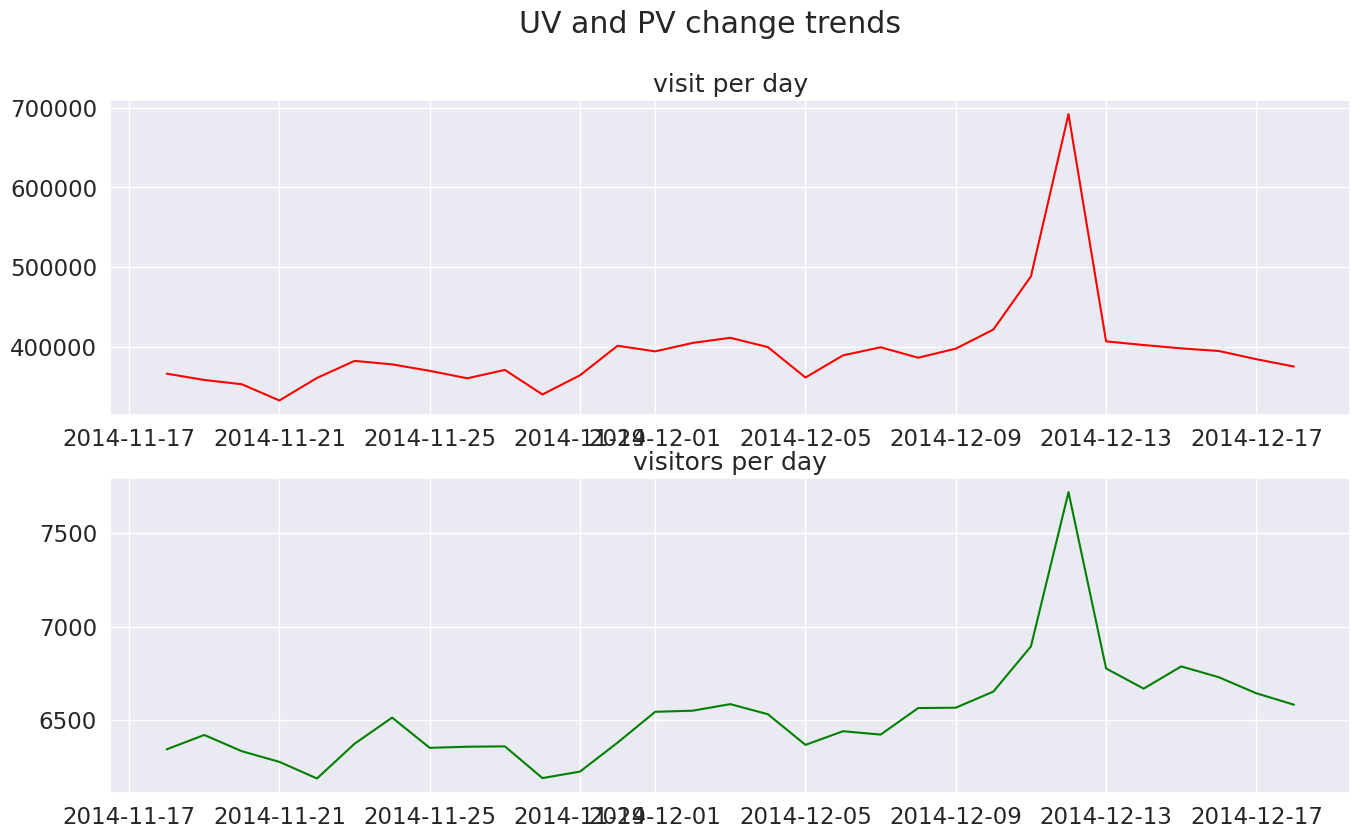

In [36]:
plt.figure(figsize=(16,9))
plt.subplot(211)
plt.plot(pv_daily, color='red')
plt.title('visit per day')
plt.subplot(212)
plt.plot(uv_daily,color='green')
plt.title('visitors per day')
plt.suptitle('UV and PV change trends')
plt.show()


上面两幅图可以发现双12达到峰值。

In [37]:
pv_daily = data_user.groupby('hour').count()['user_id']

In [38]:
pv_daily.head(30)

hour
0      517404
1      267682
2      147090
3       98516
4       80487
5       88296
6      158798
7      287337
8      396106
9      485951
10     550665
11     526940
12     531957
13     598343
14     594215
15     598849
16     576207
17     505936
18     547383
19     735192
20     935161
21    1090178
22    1088961
23     849252
Name: user_id, dtype: int64

In [39]:
uv_daily = data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count())


In [40]:
pv_uv_daily = pd.concat([pv_daily, uv_daily],axis=1)

In [41]:
pv_uv_daily.columns=['pv','uv']

In [42]:
pv_uv_daily.head()

,pv,uv
hour,,
0,517404,5786
1,267682,3780
2,147090,2532
3,98516,1937
4,80487,1765


In [43]:
pv_uv_daily.corr(method = 'spearman') 

,pv,uv
pv,1.000000,0.903478
uv,0.903478,1.000000


In [44]:
pv_uv_daily.corr(method = 'pearson')  #皮尔逊相关系数

,pv,uv
pv,1.000000,0.835305
uv,0.835305,1.000000


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

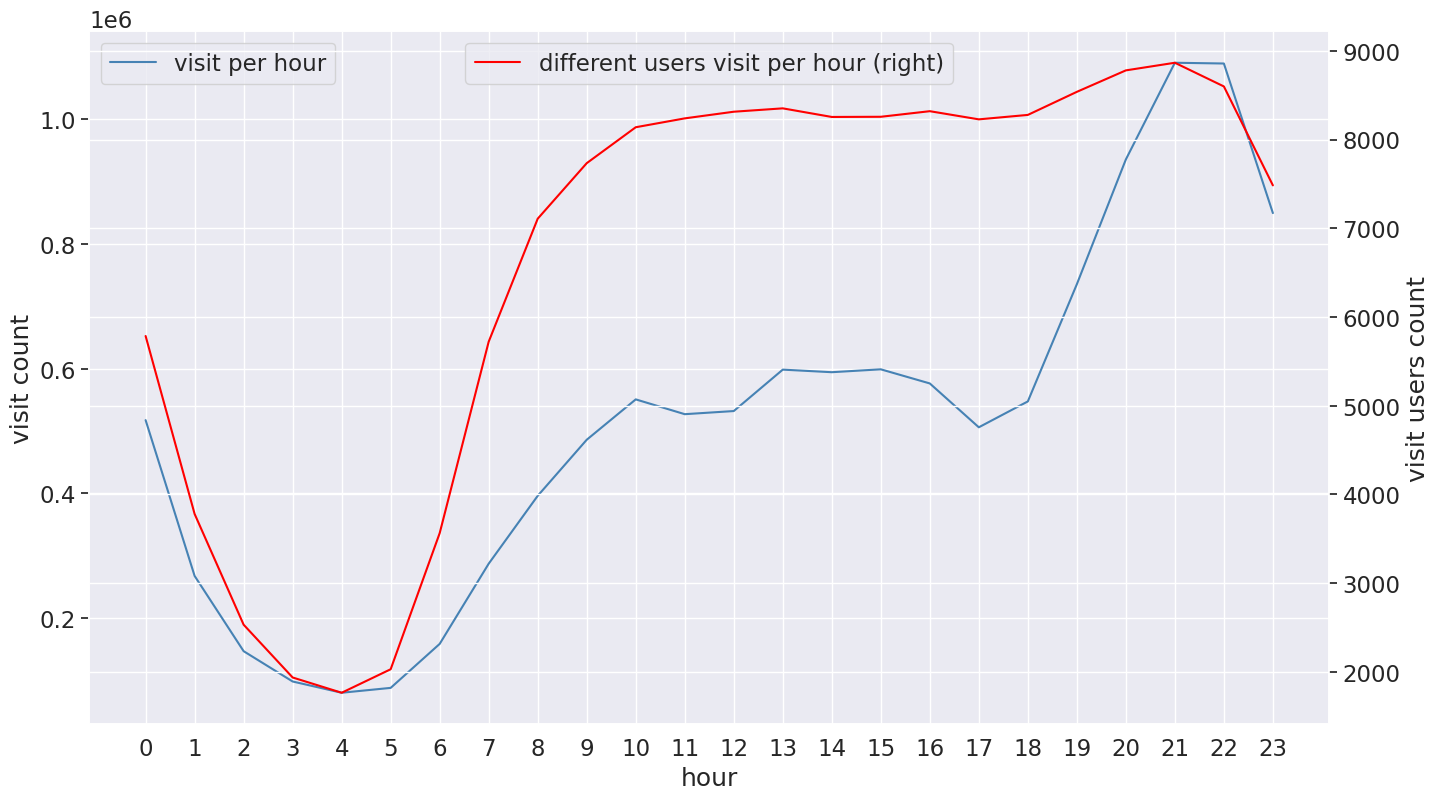

In [45]:
plt.figure(figsize=(16,9))
pv_uv_daily['pv'].plot(color= 'steelblue', label ='visit per hour')
plt.legend(loc ='upper center')
plt.ylabel('visit count')
pv_uv_daily['uv'].plot(color= 'red', label='different users visit per hour',secondary_y =True)
plt.ylabel('visit users count')
plt.xticks(range(0,24),pv_uv_daily.index)
plt.legend(loc ='upper center')
plt.grid(True)
plt.show()


In [46]:
pv_detail = pd.pivot_table(columns ='behavior_type',index ='hour' , data = data_user,values = 'user_id',aggfunc=np.size)

In [47]:
pv_detail #点击、收藏、加入购物车和支付 的比例

behavior_type,1,2,3,4
hour,,,,
0,487341,11062,14156,4845
1,252991,6276,6712,1703
2,139139,3311,3834,806
3,93250,2282,2480,504
4,75832,2010,2248,397
5,83545,2062,2213,476
6,150356,3651,3768,1023
7,272470,5885,7044,1938
8,374701,7849,9970,3586


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

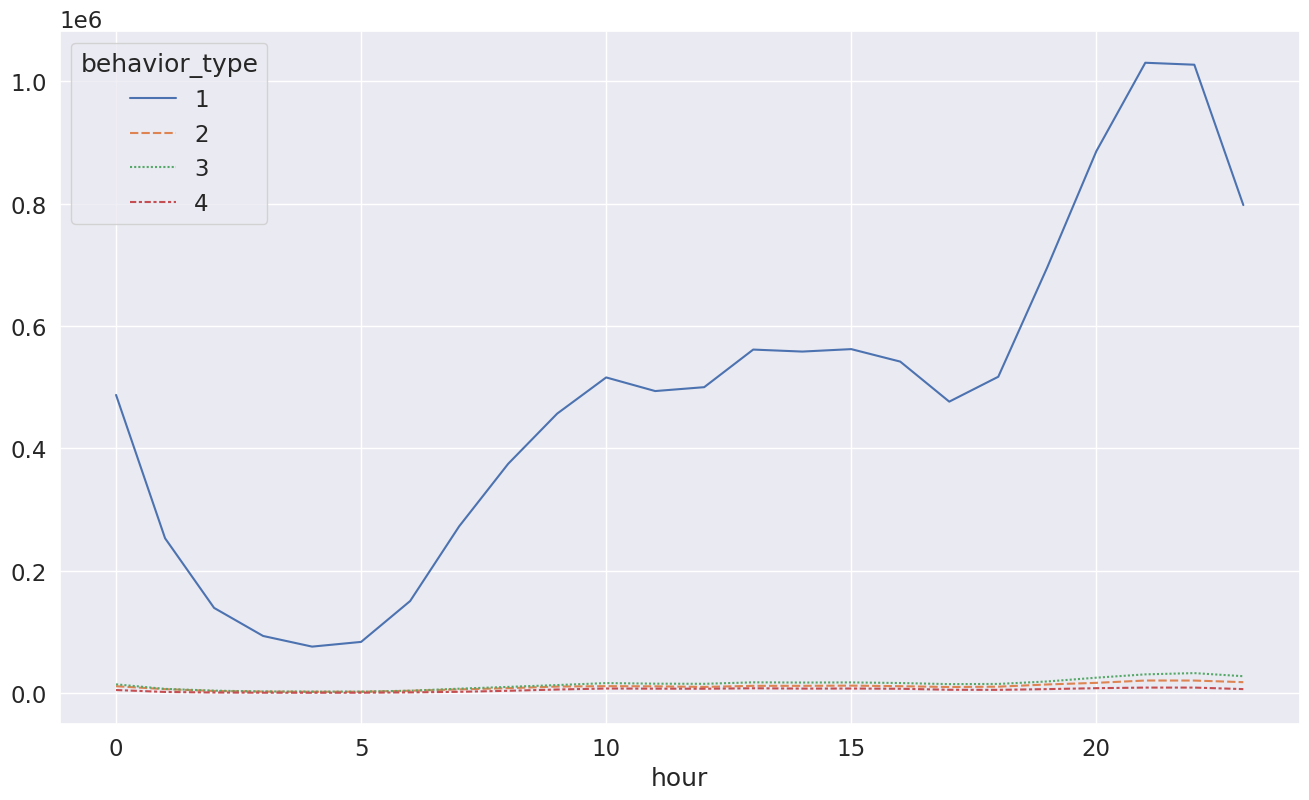

In [48]:
plt.figure(figsize=(16,9))
sns.lineplot(data = pv_detail)
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

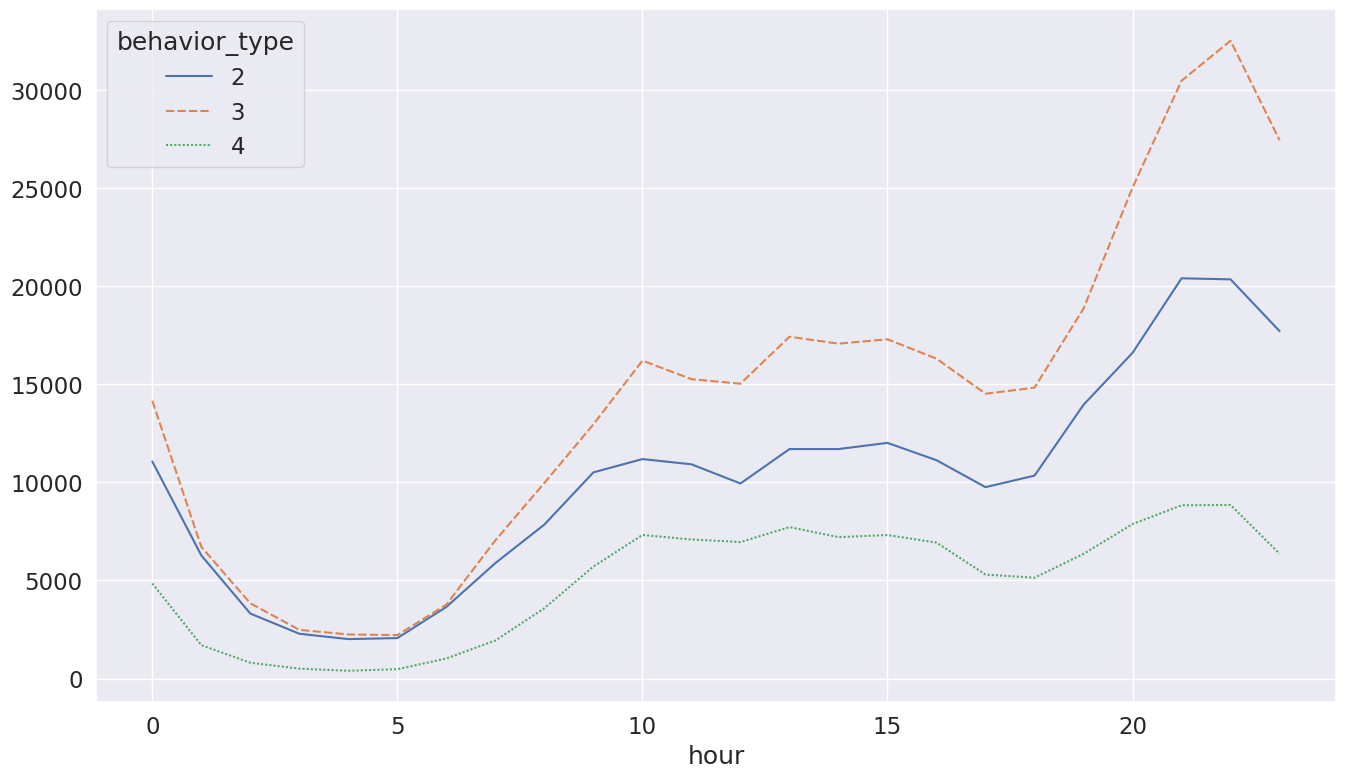

In [49]:
# 因为点击量很高，所以应该把其余三个单独拿出来看一下
plt.figure(figsize=(16,9))
sns.lineplot(data = pv_detail.iloc[:,1:])
plt.show()

In [50]:
data_user_buy = data_user[data_user.behavior_type =='4'].groupby('user_id').size()


In [51]:
data_user_buy

user_id
100001878    36
100011562     3
100012968    15
100014060    24
100024529    26
             ..
99960313      8
9996155       6
99963140     19
99968428     38
99989881     17
Length: 8886, dtype: int64

In [52]:
data_user_buy.describe()  #可以知道大部分用户一个月的购买次数是8次

count    8886.000000
mean       13.527459
std        19.698786
min         1.000000
25%         4.000000
50%         8.000000
75%        17.000000
max       809.000000
dtype: float64

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

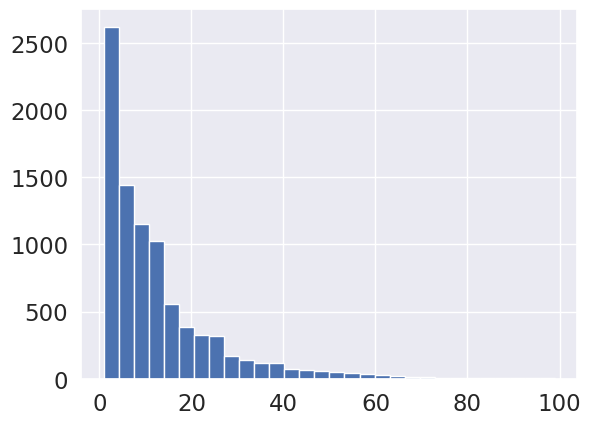

In [53]:
data_user_buy_tmp = data_user_buy[data_user_buy < 100]  # 只保留小于100的值
plt.hist(x =data_user_buy_tmp, bins=30)
plt.show()

上图中，纵坐标表示的是每个区间（bin）中数据点的频数。

In [54]:
# 查看每个用户每天的支付次数
data_user_buy1= data_user[data_user.behavior_type =='4' ].groupby(['date' , 'user_id'])

In [55]:
data_user_buy1

In [56]:
data_user_buy1.count()
# 注意这里是 count() ， 每一行的数据都是相同的

item_id  behavior_type  user_geohash  item_category  \
date       user_id                                                          
2014-11-18 100001878        1              1             1              1   
           100014060        2              2             2              2   
           100024529        6              6             0              6   
           100027681        3              3             0              3   
           10004287         2              2             0              2   
...                       ...            ...           ...            ...   
2014-12-18 99674599        10             10            10             10   
           99785045         4              4             0              4   
           99791909         1              1             1              1   
           99795650         1              1             0              1   
           99796276        17             17            17             17   

                      time  hour  
date       user_id                
2014-11-18 100001878     1     1  
           100014060     2     2  
           100024529     6     6  
           100027681     3     3  
           10004287      2     2  
...                    ...   ...  
2014-12-18 99674599     10    10  
           99785045      4     4  
           99791909      1     1  
           99795650      1     1  
           99796276     17    17  

[49201 rows x 6 columns]

In [57]:
# reset_index 之后原有的索引列就会变为数据列
data_user_buy1.count()['behavior_type'].reset_index().rename(columns={'behavior_type':' total'})  #按照日期不同用户的购买行为次数

,date,user_id,total
0,2014-11-18,100001878,1
1,2014-11-18,100014060,2
2,2014-11-18,100024529,6
3,2014-11-18,100027681,3
4,2014-11-18,10004287,2
...,...,...,...
49196,2014-12-18,99674599,10
49197,2014-12-18,99785045,4
49198,2014-12-18,99791909,1
49199,2014-12-18,99795650,1


In [58]:
data_user_buy1= data_user[data_user.behavior_type =='4' ].groupby(['date' , 'user_id']).count()['behavior_type'].reset_index().rename(columns={'behavior_type':'total'})  

In [59]:
data_user_buy1

,date,user_id,total
0,2014-11-18,100001878,1
1,2014-11-18,100014060,2
2,2014-11-18,100024529,6
3,2014-11-18,100027681,3
4,2014-11-18,10004287,2
...,...,...,...
49196,2014-12-18,99674599,10
49197,2014-12-18,99785045,4
49198,2014-12-18,99791909,1
49199,2014-12-18,99795650,1


In [60]:
# 每天用户的平均支付次数 = 每天总共的支付次数 / 每天不同用户的数量
data_user_buy2=data_user_buy1.groupby('date').sum()['total']/ data_user_buy1.groupby('date').count()['total']

In [61]:
data_user_buy2

date
2014-11-18    2.423652
2014-11-19    2.439444
2014-11-20    2.320375
2014-11-21    2.271429
2014-11-22    2.530120
2014-11-23    2.330780
2014-11-24    2.248031
2014-11-25    2.313961
2014-11-26    2.402824
2014-11-27    2.403405
2014-11-28    2.231623
2014-11-29    2.331881
2014-11-30    2.357236
2014-12-01    2.359083
2014-12-02    2.284543
2014-12-03    2.289334
2014-12-04    2.328707
2014-12-05    2.223041
2014-12-06    2.253444
2014-12-07    2.320741
2014-12-08    2.204384
2014-12-09    2.413576
2014-12-10    2.230236
2014-12-11    2.226363
2014-12-12    3.913523
2014-12-13    2.245320
2014-12-14    2.312749
2014-12-15    2.313460
2014-12-16    2.285455
2014-12-17    2.302548
2014-12-18    2.310567
Name: total, dtype: float64

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

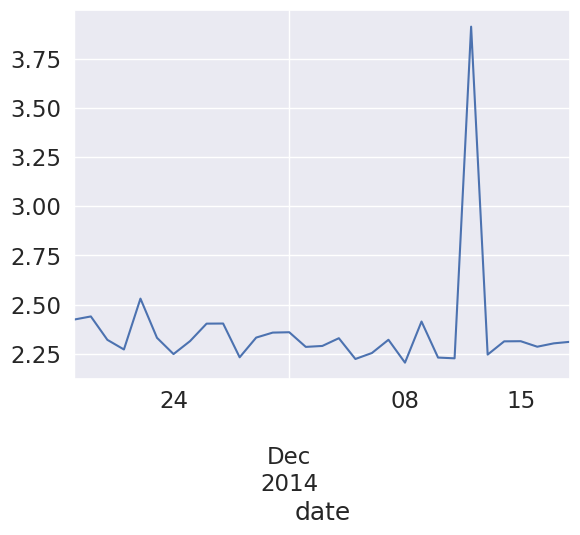

In [62]:
data_user_buy2.plot()  #因为数据是11月18号到12月18号的
plt.show()

In [63]:
data_user_buy2.describe()   #发现每天大家的平均购物次数是2.3次

count    31.000000
mean      2.368446
std       0.296108
min       2.204384
25%       2.262436
50%       2.313460
75%       2.358159
max       3.913523
Name: total, dtype: float64

日 ARPU：

In [64]:
data_user['operation']=1  # 增加一列操作，因为淘宝的数据没有金额，我们这样来模拟一下
data_user_buy2 = data_user.groupby(['date' , 'user_id' , 'behavior_type'])['operation'].count()


In [65]:
data_user_buy2

date        user_id    behavior_type
2014-11-18  100001878  1                127
                       3                  8
                       4                  1
            100014060  1                 23
                       3                  2
                                       ... 
2014-12-18  9996155    3                  2
            99963140   1                 78
                       3                  1
            99968428   1                  4
            99989881   1                 11
Name: operation, Length: 375440, dtype: int64

In [66]:
data_user_buy2.reset_index ().rename(columns ={'operation':'total'})


,date,user_id,behavior_type,total
0,2014-11-18,100001878,1,127
1,2014-11-18,100001878,3,8
2,2014-11-18,100001878,4,1
3,2014-11-18,100014060,1,23
4,2014-11-18,100014060,3,2
...,...,...,...,...
375435,2014-12-18,9996155,3,2
375436,2014-12-18,99963140,1,78
375437,2014-12-18,99963140,3,1
375438,2014-12-18,99968428,1,4


In [67]:
data_user_buy2 = data_user.groupby(['date' , 'user_id' , 'behavior_type'])['operation'].count().reset_index().rename(columns ={'operation':'total'})

In [68]:
data_user_buy2

,date,user_id,behavior_type,total
0,2014-11-18,100001878,1,127
1,2014-11-18,100001878,3,8
2,2014-11-18,100001878,4,1
3,2014-11-18,100014060,1,23
4,2014-11-18,100014060,3,2
...,...,...,...,...
375435,2014-12-18,9996155,3,2
375436,2014-12-18,99963140,1,78
375437,2014-12-18,99963140,3,1
375438,2014-12-18,99968428,1,4


In [69]:
data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.sum()/len(x.user_id.unique()))  #每天的活跃用户消费次数
# x 传进去的是 groupby 之后的每一个分组数据

/tmp/ipykernel_6831/2673435378.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.sum()/len(x.user_id.unique()))  #每天的活跃用户消费次数


date
2014-11-18    0.588050
2014-11-19    0.574143
2014-11-20    0.546660
2014-11-21    0.481358
2014-11-22    0.577016
2014-11-23    0.525184
2014-11-24    0.526025
2014-11-25    0.545426
2014-11-26    0.562058
2014-11-27    0.577135
2014-11-28    0.519955
2014-11-29    0.515906
2014-11-30    0.566860
2014-12-01    0.597341
2014-12-02    0.552824
2014-12-03    0.589977
2014-12-04    0.565151
2014-12-05    0.521282
2014-12-06    0.508075
2014-12-07    0.507007
2014-12-08    0.520871
2014-12-09    0.525282
2014-12-10    0.483464
2014-12-11    0.467943
2014-12-12    1.975518
2014-12-13    0.513282
2014-12-14    0.522346
2014-12-15    0.554590
2014-12-16    0.560410
2014-12-17    0.544182
2014-12-18    0.544819
dtype: float64

/tmp/ipykernel_6831/554955621.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.sum()/len(x.user_id.unique())).plot()


<Axes: xlabel='date'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

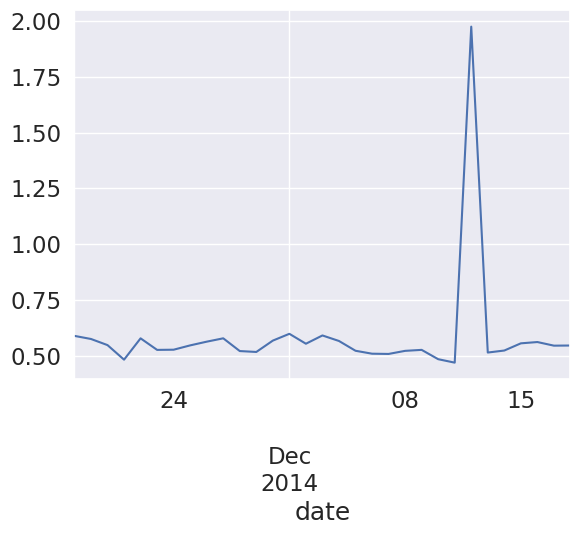

In [70]:
data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.sum()/len(x.user_id.unique())).plot()

In [71]:
#上图可以看出用户平均每天购物不到1次，双12的时候达到快2次

In [72]:
data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.count()/len(x.user_id.unique()))

/tmp/ipykernel_6831/3935441161.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.count()/len(x.user_id.unique()))


date
2014-11-18    0.242630
2014-11-19    0.235358
2014-11-20    0.235591
2014-11-21    0.211918
2014-11-22    0.228059
2014-11-23    0.225326
2014-11-24    0.233994
2014-11-25    0.235711
2014-11-26    0.233915
2014-11-27    0.240132
2014-11-28    0.232994
2014-11-29    0.221240
2014-11-30    0.240477
2014-12-01    0.253209
2014-12-02    0.241985
2014-12-03    0.257707
2014-12-04    0.242689
2014-12-05    0.234490
2014-12-06    0.225466
2014-12-07    0.218468
2014-12-08    0.236289
2014-12-09    0.217636
2014-12-10    0.216777
2014-12-11    0.210183
2014-12-12    0.504793
2014-12-13    0.228601
2014-12-14    0.225855
2014-12-15    0.239723
2014-12-16    0.245207
2014-12-17    0.236339
2014-12-18    0.235795
dtype: float64

可以看出平时只有 20% 的用户有消费行为，但是双 12 有 50% 的用户有消费行为。

/tmp/ipykernel_6831/3110749397.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.count()/len(x.user_id.unique())).plot()


<Axes: xlabel='date'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

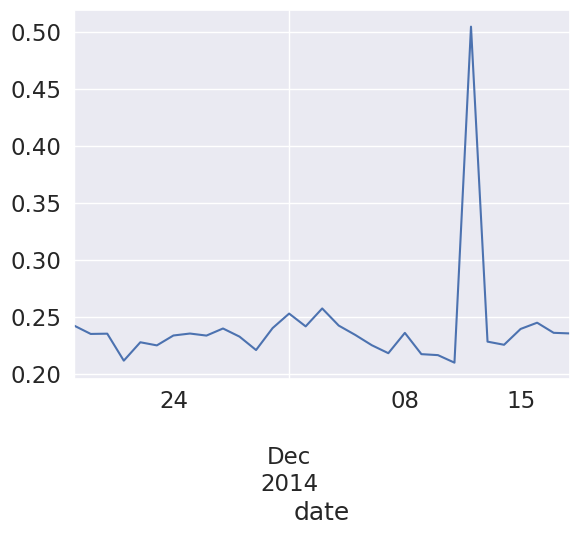

In [73]:
# 某一天有多少人发生了购买行为(一个人一天只算一次, 即使他买了多次)
data_user_buy2.groupby('date').apply(lambda x: x[x.behavior_type =='4' ].total.count()/len(x.user_id.unique())).plot()

In [74]:
data_user_buy3 = data_user[data_user['behavior_type'] == '4'].groupby(['user_id' , 'date', 'hour'])['operation'].sum()


In [75]:
data_user_buy3

user_id    date        hour
100001878  2014-11-18  20      1
           2014-11-24  20      3
           2014-11-25  13      2
           2014-11-26  16      2
                       21      1
                              ..
99989881   2014-12-05  1       1
           2014-12-09  21      1
           2014-12-12  0       2
           2014-12-14  20      1
           2014-12-15  23      1
Name: operation, Length: 65223, dtype: int64

/tmp/ipykernel_6831/2451882293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_user_buy3)


<Axes: xlabel='operation', ylabel='Density'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

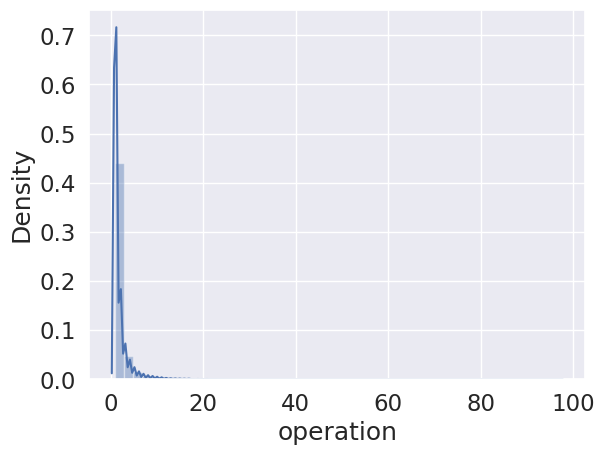

In [76]:
sns.distplot(data_user_buy3)


/tmp/ipykernel_6831/2771968746.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_user_buy4)


<Axes: xlabel='operation', ylabel='Density'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

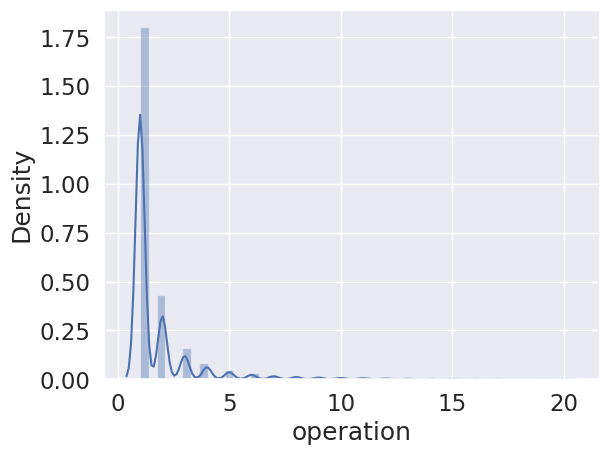

In [77]:
data_user_buy4 = data_user_buy3[data_user_buy3 <= 20]
sns.distplot(data_user_buy4)

# 复购行为分析

In [78]:
# 同一天购买不算复购
data_rebuy = data_user[data_user.behavior_type =='4' ].groupby('user_id')['date'].apply(lambda x: len(x. unique()))

In [79]:
data_rebuy  #知道每个用户购买了多少次

user_id
100001878    15
100011562     3
100012968    11
100014060    12
100024529     9
             ..
99960313      5
9996155       3
99963140      8
99968428      9
99989881     13
Name: date, Length: 8886, dtype: int64

In [80]:
data_rebuy[data_rebuy>=2].count()/data_rebuy.count()  #复购行为达到87%


np.float64(0.8717083051991897)

# 复购时间间隔

In [81]:
data_day_buy = data_user[data_user.behavior_type == '4'].groupby('user_id').date.apply(lambda x:x.sort_values())

In [82]:
data_day_buy

user_id            
100001878  270407     2014-11-18
           2439076    2014-11-24
           2439090    2014-11-24
           2440428    2014-11-24
           2660355    2014-11-25
                         ...    
99989881   8203371    2014-12-09
           9248497    2014-12-12
           9249028    2014-12-12
           10601909   2014-12-14
           11085567   2014-12-15
Name: date, Length: 120205, dtype: datetime64[ns]

In [83]:
# diff 是将下一行减去上一行，这样就得到复购的时间间隔，单位 days
data_day_buy = data_user[data_user.behavior_type == '4'].groupby('user_id').date.apply(lambda x:x.sort_values()).diff(1).dropna()
# 每个用户的第一行是 nan, 所以要 dropna()

In [84]:
data_day_buy

user_id            
100001878  2439076    6 days
           2439090    0 days
           2440428    0 days
           2660355    1 days
           2672617    0 days
                       ...  
99989881   8203371    4 days
           9248497    3 days
           9249028    0 days
           10601909   2 days
           11085567   1 days
Name: date, Length: 120204, dtype: timedelta64[ns]

In [85]:
data_day_buy.map(lambda x: x.days)

user_id            
100001878  2439076     6
           2439090     0
           2440428     0
           2660355     1
           2672617     0
                      ..
99989881   8203371     4
           9248497     3
           9249028     0
           10601909    2
           11085567    1
Name: date, Length: 120204, dtype: int64

# 漏斗分析

In [86]:
data_day_buy4=data_day_buy
data_day_buy4

user_id            
100001878  2439076    6 days
           2439090    0 days
           2440428    0 days
           2660355    1 days
           2672617    0 days
                       ...  
99989881   8203371    4 days
           9248497    3 days
           9249028    0 days
           10601909   2 days
           11085567   1 days
Name: date, Length: 120204, dtype: timedelta64[ns]

In [87]:
data_user_count = data_user.groupby('behavior_type').size()

In [88]:
data_user_count #四种行为的数量  点击、收藏、加入购物车和支付

behavior_type
1    11550581
2      242556
3      343564
4      120205
dtype: int64

In [89]:
pv_all = data_user['user_id'].count()

In [90]:
pv_all

np.int64(12256906)

总浏览量中有多少人没有点击就离开了，这个就是流失率。

In [91]:
# 这个流失率的计算其实不是很合理，意思一下
# 正常来说，流失率是进入后，什么也没做
(pv_all - data_user_count[0])/pv_all  # 流失率

/tmp/ipykernel_6831/578971390.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (pv_all - data_user_count[0])/pv_all  # 流失率


np.float64(0.05762669632939993)

In [92]:
(data_user_count[0] - data_user_count[2])/data_user_count[0]  #有多少人点击了但是没有加入购物车


/tmp/ipykernel_6831/1106988028.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (data_user_count[0] - data_user_count[2])/data_user_count[0]  #有多少人点击了但是没有加入购物车


np.float64(0.9702556953628566)

In [93]:
(data_user_count[2] - data_user_count[1])/data_user_count[2] #并不是所有加入购物车的人都进行了收藏，有29%的人并没有收藏

/tmp/ipykernel_6831/4276666200.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (data_user_count[2] - data_user_count[1])/data_user_count[2] #并不是所有加入购物车的人都进行了收藏，有29%的人并没有收藏


np.float64(0.29400053556251526)

In [94]:
(data_user_count[1] - data_user_count[3])/data_user_count[1] #收藏的人有50%进行了支付

/tmp/ipykernel_6831/3563178148.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (data_user_count[1] - data_user_count[3])/data_user_count[1] #收藏的人有50%进行了支付


np.float64(0.5044237207077953)

In [95]:
from datetime import datetime

In [96]:
recent_buy_time=data_user[data_user['behavior_type'] == '4'].groupby ('user_id')['date'].apply(lambda x:datetime(2014,12,20)- x.sort_values().iloc[-1])
# 这里 -1 是拿取每个用户最后一次购买的日期，datetime(2014,12,20) 是参考日期
# 每个用户最新的购买日期和参考日期之间的时间间隔

In [97]:
recent_buy_time=recent_buy_time.reset_index().rename(columns={'date':'recent'})

In [98]:
recent_buy_time

,user_id,recent
0,100001878,2 days
1,100011562,4 days
2,100012968,2 days
3,100014060,2 days
4,100024529,4 days
...,...,...
8881,99960313,7 days
8882,9996155,13 days
8883,99963140,5 days
8884,99968428,6 days


In [99]:
recent_buy_time.recent= recent_buy_time.recent.apply(lambda x: x.days)  #去掉days


In [100]:
recent_buy_time


,user_id,recent
0,100001878,2
1,100011562,4
2,100012968,2
3,100014060,2
4,100024529,4
...,...,...
8881,99960313,7
8882,9996155,13
8883,99963140,5
8884,99968428,6


In [101]:
buy_freq = data_user[data_user ['behavior_type'] =='4'].groupby('user_id').date.count()


In [102]:
buy_freq=buy_freq.reset_index().rename(columns={'date':'freq'})

In [103]:
rfm= pd.merge (recent_buy_time, buy_freq,left_on ='user_id' ,right_on ='user_id')


In [104]:
rfm

,user_id,recent,freq
0,100001878,2,36
1,100011562,4,3
2,100012968,2,15
3,100014060,2,24
4,100024529,4,26
...,...,...,...
8881,99960313,7,8
8882,9996155,13,6
8883,99963140,5,19
8884,99968428,6,38


In [ ]:
rfm['recent_value'] = pd.qcut(rfm.recent,2,labels=['2','1']) # 分位数，上官网查

In [110]:
rfm['freq_value'] = pd.qcut(rfm.freq,2,labels=['1','2'])

In [111]:
rfm['rfm'] = rfm['recent_value'].str.cat(rfm['freq_value'])


In [112]:
rfm.describe()

,recent,freq
count,8886.000000,8886.000000
mean,7.811839,13.527459
std,6.678478,19.698786
min,2.000000,1.000000
25%,3.000000,4.000000
50%,6.000000,8.000000
75%,9.000000,17.000000
max,32.000000,809.000000


In [ ]:
rfm  # 22是最佳

,user_id,recent,freq,recent_value,freq_value,rfm
0,100001878,2,36,2,2,22
1,100011562,4,3,2,1,21
2,100012968,2,15,2,2,22
3,100014060,2,24,2,2,22
4,100024529,4,26,2,2,22
...,...,...,...,...,...,...
8881,99960313,7,8,1,1,11
8882,9996155,13,6,1,1,11
8883,99963140,5,19,2,2,22
8884,99968428,6,38,2,2,22
